In [2]:
# MNIST Hand written Digit Classification

In [3]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [4]:
#Load the dataset
from keras.datasets import mnist
objects=mnist
(train_img,train_lab),(test_img,test_lab)=objects.load_data()

11490434/11490434 [==============================] - 3s 0us/step


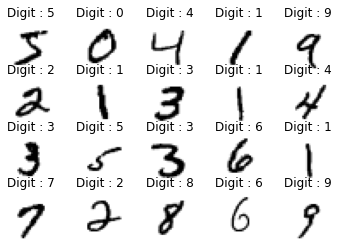

In [5]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i],cmap='gray_r')
  plt.title("Digit : {}".format(train_lab[i]))
  plt.axis('off')

In [6]:
print('Training images shape : ',train_img.shape)
print('Testing images shape : ',test_img.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [7]:
#Creating the model
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
input_layer= Flatten(input_shape=(28,28))
model.add(input_layer)
hidden_layer1=Dense(512,activation='relu')
model.add(hidden_layer1)
hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

In [8]:
#Compiling the Sequential model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(train_img,train_lab,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 34s 17ms/step - loss: 1.5727 - accuracy: 0.9006
Epoch 2/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1999 - accuracy: 0.9489
Epoch 3/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1797 - accuracy: 0.9531
Epoch 4/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1586 - accuracy: 0.9590
Epoch 5/20
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1459 - accuracy: 0.9625
Epoch 6/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1226 - accuracy: 0.9685
Epoch 7/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1137 - accuracy: 0.9710
Epoch 8/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1067 - accuracy: 0.9729
Epoch 9/20
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0994 - accuracy: 0.9763
Epoch 10/20
1875/1875 [==============================] - 30s 16m

In [12]:
loss_and_acc=model.evaluate(test_img,test_lab,verbose=2)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 - 2s - loss: 0.2013 - accuracy: 0.9720 - 2s/epoch - 7ms/step
Test Loss 0.20127609372138977
Test Accuracy 0.972000002861023


313/313 [==============================] - 2s 6ms/step
Predicted Value:  7
Successful prediction


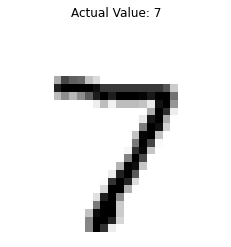

In [13]:
plt.imshow(test_img[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[0]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
if(test_lab[0]==(np.argmax(prediction[0]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

In [14]:
#Convolution Neural Network for MNIST Hand written Digit Classification

In [15]:
from tensorflow import keras
from keras import layers
inputs = keras.Input(shape=(28, 28, 1))
print(inputs.shape)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

(None, 28, 28, 1)


In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [16]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 37s 38ms/step - loss: 0.1616 - accuracy: 0.9501
Epoch 2/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0442 - accuracy: 0.9861
Epoch 3/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0301 - accuracy: 0.9908
Epoch 4/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0230 - accuracy: 0.9932
Epoch 5/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0172 - accuracy: 0.9949


In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 3s 9ms/step - loss: 0.0246 - accuracy: 0.9924
Test accuracy: 0.992


In [20]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [21]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_2 (Flatten)         (None, 61952)             0         
                                                                 
 dense_4 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712202 (2.72 MB)
Trainable params: 712202 (2.